In [0]:
import pandas as pd
import numpy as np
import json
import csv
import requests
from collections import Counter
import nltk
import pandas as pd
import re as regex
from time import time
import gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt




In [2]:
#NLTK
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!pip install ekphrasis


In [4]:
!git clone #YourPersonalRepo

fatal: destination path 'COVID-TwitterDiscourse' already exists and is not an empty directory.


In [5]:
%cd ..
!ls

/
bin					   etc	  opt	 sys
boot					   home   proc	 tensorflow-1.15.2
content					   lib	  root	 tmp
datalab					   lib32  run	 tools
dev					   lib64  sbin	 usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  srv	 var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  swift


In [0]:
#Path to list of governors

dem_df = pd.read_csv('/content/COVID-TwitterDiscourse/Dataset/governorList/final_democrat.csv')
rep_df = pd.read_csv("/content/COVID-TwitterDiscourse/Dataset/governorList/final_republican.csv")


In [0]:
#Path to the Governer's tweets
directory_path_democrat_personal = "/content/COVID-TwitterDiscourse/Dataset/tweets/democrat/personal/"
directory_path_democrat_official = "/content/COVID-TwitterDiscourse/Dataset/tweets/democrat/official/"

directory_path_republican_personal = "/content/COVID-TwitterDiscourse/Dataset/tweets/republican/personal/"
directory_path_republican_official = "/content/COVID-TwitterDiscourse/Dataset/tweets/republican/official/"

file_path_dem = []
file_path_republican = []

#Adding all the file names
for ind in dem_df.index: 
    file_path_dem.append(directory_path_democrat_personal + str(ind) + ".json")
    file_path_dem.append(directory_path_democrat_official + str(ind) + ".json")

for ind in rep_df.index: 
    file_path_republican.append(directory_path_republican_personal + str(ind) + ".json")
    file_path_republican.append(directory_path_republican_official + str(ind) + ".json")



    

In [0]:
#Loading all the JSON files

dem_tweets_file=[]
rep_tweets_file = []
for ind in range(len(file_path_dem)): 
  with open(file_path_dem[ind]) as f:
    dem_tweets_file.append(json.load(f))

rep_tweets_file=[]
for ind in range(len(file_path_republican)): 
  with open(file_path_republican[ind]) as f1:
    rep_tweets_file.append(json.load(f1))

In [0]:
#Converting the JSON files to Data Frames

dem_tweets = pd.DataFrame()
for ind in range(len(dem_tweets_file)): 
  dem_tweets = dem_tweets.append(pd.json_normalize(dem_tweets_file[ind]))
  dem_tweets['Party'] = 'Democrat'

rep_tweets = pd.DataFrame()
for ind in range(len(rep_tweets_file)): 
  rep_tweets = rep_tweets.append(pd.json_normalize(rep_tweets_file[ind]))
  rep_tweets['Party'] = 'Republican'

In [0]:
#Merging Democrats and Republicans DataFrames

tweets = dem_tweets.append(rep_tweets)
tweets.reset_index(inplace=True, drop=True)

In [0]:
tweets['hashtag'] = tweets['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))


In [74]:
tweets

,tweet_text,timestamp,id,user,Party,hashtag
0,RT @CBSThisMorning: ONLY ON @CBSThisMorning: @...,2020-04-20 22:56:40,1.252371e+18,GavinNewsom,Democrat,[coronaviru]
1,"- 70,000+ laptops, iPads, and more.\n- $30M fo...",2020-04-20 21:06:28,1.252343e+18,GavinNewsom,Democrat,[]
2,"NEW: CA has 30,978 confirmed positive cases of...",2020-04-20 19:19:21,1.252316e+18,GavinNewsom,Democrat,[COVID19]
3,.@JenSiebelNewsom and I are giving an update o...,2020-04-20 19:02:10,1.252312e+18,GavinNewsom,Democrat,[COVID19]
4,TUNE IN NOW for a #COVID19 update. https://t.c...,2020-04-20 18:58:38,1.252311e+18,GavinNewsom,Democrat,[COVID19]
...,...,...,...,...,...,...
29205,"I'll be hosting listening sessions in Rawlins,...",2020-01-28 17:00:34,1.222203e+18,GovernorGordon,Republican,[]
29206,Today is International Holocaust Remembrance D...,2020-01-27 15:58:36,1.221825e+18,GovernorGordon,Republican,[]
29207,Great to meet barrel racer extraordinaire @Ped...,2020-01-26 04:18:46,1.221286e+18,GovernorGordon,Republican,[]
29208,Thanks to Pine Bluffs Elementary School for ho...,2020-01-22 17:14:56,1.220032e+18,GovernorGordon,Republican,[]


In [0]:
#Cities in USA

cities = pd.read_csv('/content/uscities.csv')

In [0]:
#Considering cities with only population > 50,000

cities = cities[cities['population'] > 50000.0]

In [0]:
cities = cities['city'].to_list()

In [0]:

cities= [x.lower() for x in cities]


In [0]:
list_of_states_abbr =["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
list_of_states_abbr = [x.lower() for x in list_of_states_abbr]

list_without_abbr = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
          "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
          "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
          "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
          "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
          "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
          "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
          "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
list_without_abbr = [x.lower() for x in list_without_abbr]
cities_and_states = cities + list_without_abbr


In [80]:
!pip install tweet-preprocessor

In [0]:
import preprocessor as p

In [0]:
for i in range(len(tweets)):
  tweets.loc[i,'text'] = p.clean(tweets['tweet_text'][i])

In [0]:
w_tokenizer =  TweetTokenizer() 
tweets['text'] = tweets['text'].apply(lambda x: x.lower())
text = tweets['text'].apply(w_tokenizer.tokenize)
#text = text.astype(str).str.lower()

In [84]:
tweets

,tweet_text,timestamp,id,user,Party,hashtag,text
0,RT @CBSThisMorning: ONLY ON @CBSThisMorning: @...,2020-04-20 22:56:40,1.252371e+18,GavinNewsom,Democrat,[coronaviru],: only on : talks to about california’s respon...
1,"- 70,000+ laptops, iPads, and more.\n- $30M fo...",2020-04-20 21:06:28,1.252343e+18,GavinNewsom,Democrat,[],"- ,000+ laptops, ipads, and more. - $30m for h..."
2,"NEW: CA has 30,978 confirmed positive cases of...",2020-04-20 19:19:21,1.252316e+18,GavinNewsom,Democrat,[COVID19],"new: ca has ,978 confirmed positive cases of ...."
3,.@JenSiebelNewsom and I are giving an update o...,2020-04-20 19:02:10,1.252312e+18,GavinNewsom,Democrat,[COVID19],. and i are giving an update on this morning. ...
4,TUNE IN NOW for a #COVID19 update. https://t.c...,2020-04-20 18:58:38,1.252311e+18,GavinNewsom,Democrat,[COVID19],tune in now for a update.
...,...,...,...,...,...,...,...
29205,"I'll be hosting listening sessions in Rawlins,...",2020-01-28 17:00:34,1.222203e+18,GovernorGordon,Republican,[],"i'll be hosting listening sessions in rawlins,..."
29206,Today is International Holocaust Remembrance D...,2020-01-27 15:58:36,1.221825e+18,GovernorGordon,Republican,[],today is international holocaust remembrance d...
29207,Great to meet barrel racer extraordinaire @Ped...,2020-01-26 04:18:46,1.221286e+18,GovernorGordon,Republican,[],great to meet barrel racer extraordinaire at t...
29208,Thanks to Pine Bluffs Elementary School for ho...,2020-01-22 17:14:56,1.220032e+18,GovernorGordon,Republican,[],thanks to pine bluffs elementary school for ho...


In [0]:
list_contents_text = []
for index in range(len(text)):
    list_contents_text.append(' '.join(text[index]))

In [0]:
a =re.compile('|'.join(cities_and_states))
abbr = re.compile('|'.join(list_of_states_abbr))

In [0]:
#Removing state names from combined words. (Not including abbreviations because it deletes all the words with those abbreviations)

for i in range(len(list_contents_text)):
  tweets.loc[i,'text'] = a.sub('',list_contents_text[i] )

In [0]:
#tweets['text'] = tweets['text'].apply(lambda x: [item for item in x if item not in list_of_states_abbr])

In [0]:
#Data Preprocessing 
def preprocess_data(data):

  #Removes Numbers
  #data = data.apply(lambda x: re.sub('\d+', '', (x)))

  data = data.astype(str).str.replace('\d+', '')

  #Removes URLs
  data = data.str.replace('http\S+|www.\S+', '', case=False)  
  lower_text = data.str.lower()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  w_tokenizer =  TweetTokenizer()

  def lemmatize_text(text): 
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

  def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
    return new_words
  

  words = lower_text.apply(lemmatize_text)
  words = words.apply(remove_punctuation)

  return pd.DataFrame(words)

In [0]:
pre_tweets = preprocess_data(tweets['text'])
tweets['text'] = pre_tweets

In [0]:
#Removing Stop Words & abbreviated state names(whole string matching)

stop_words = set(stopwords.words('english'))
tweets['text'] = tweets['text'].apply(lambda x: [item for item in x if item not in stop_words])
tweets['text'] = tweets['text'].apply(lambda x: [item for item in x if item not in list_of_states_abbr])


In [92]:
tweets

,tweet_text,timestamp,id,user,Party,hashtag,text
0,RT @CBSThisMorning: ONLY ON @CBSThisMorning: @...,2020-04-20 22:56:40,1.252371e+18,GavinNewsom,Democrat,[coronaviru],"[talk, response]"
1,"- 70,000+ laptops, iPads, and more.\n- $30M fo...",2020-04-20 21:06:28,1.252343e+18,GavinNewsom,Democrat,[],"[laptop, ipads, hot, spot, connectivity, help,..."
2,"NEW: CA has 30,978 confirmed positive cases of...",2020-04-20 19:19:21,1.252316e+18,GavinNewsom,Democrat,[COVID19],"[new, ha, confirmed, positive, case, case, hos..."
3,.@JenSiebelNewsom and I are giving an update o...,2020-04-20 19:02:10,1.252312e+18,GavinNewsom,Democrat,[COVID19],"[giving, update, morning, tune]"
4,TUNE IN NOW for a #COVID19 update. https://t.c...,2020-04-20 18:58:38,1.252311e+18,GavinNewsom,Democrat,[COVID19],"[tune, update]"
...,...,...,...,...,...,...,...
29205,"I'll be hosting listening sessions in Rawlins,...",2020-01-28 17:00:34,1.222203e+18,GovernorGordon,Republican,[],"[ill, hosting, listening, session, rawlins, pi..."
29206,Today is International Holocaust Remembrance D...,2020-01-27 15:58:36,1.221825e+18,GovernorGordon,Republican,[],"[today, international, holocaust, remembrance,..."
29207,Great to meet barrel racer extraordinaire @Ped...,2020-01-26 04:18:46,1.221286e+18,GovernorGordon,Republican,[],"[great, meet, barrel, racer, extraordinaire, s..."
29208,Thanks to Pine Bluffs Elementary School for ho...,2020-01-22 17:14:56,1.220032e+18,GovernorGordon,Republican,[],"[thanks, pine, bluff, elementary, school, host..."


In [105]:
#Segmenting Hashtags into n words

from ekphrasis.classes.segmenter import Segmenter
# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")

a = []
for i in range(len(tweets)):
  if tweets['hashtag'][i] != a:
    listToStr1 = ' '.join([str(elem) for elem in tweets['hashtag'][i]])
    tweets.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)


Reading twitter - 1grams ...
Reading twitter - 2grams ...


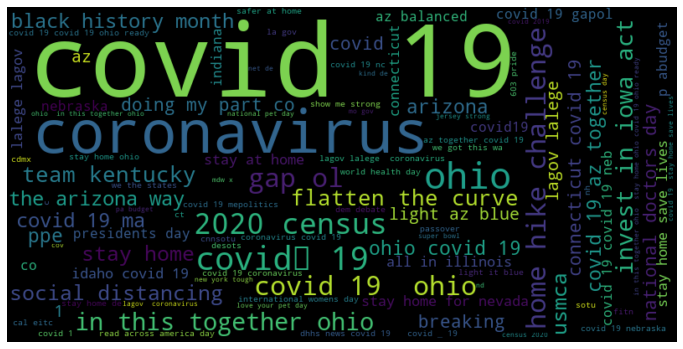

In [0]:
#Frequency of words
fdist = FreqDist(tweets['Segmented#'])
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fdist)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [0]:
tweets['Party'] = tweets['Party'].replace({'Democrat':0,'Republican':1})

In [95]:
 #0.15 for val, 0.15 for test, 0.7 for train
val_size = int(tweets.shape[0] * 0.15)
test_size = int(tweets.shape[0] * 0.15)

# Shuffle the data
tweets = tweets.sample(frac=1)
# Split tweets df to test/val/train
test_df = tweets[:test_size]
val_df = tweets[test_size:test_size+val_size]
train_df = tweets[test_size+val_size:]


train_texts, train_labels = list(train_df.text), list(train_df.Party)
val_texts, val_labels     = list(val_df.text), list(val_df.Party)
test_texts, test_labels   = list(test_df.text), list(test_df.Party)


# Check that idces do not overlap
assert set(train_df.index).intersection(set(val_df.index)) == set({})
assert set(test_df.index).intersection(set(train_df.index)) == set({})
assert set(val_df.index).intersection(set(test_df.index)) == set({})
# Check that all idces are present
assert tweets.shape[0] == len(train_labels) + len(val_labels) + len(test_labels)

# Sizes
print(
    f"Size of initial data: {tweets.shape[0]}\n"
    f"Train size: {len(train_labels)}\n"
    f"Val size: {len(val_labels)}\n"
    f"Test size: {len(test_labels)}\n"
)

Size of initial data: 29210
Train size: 20448
Val size: 4381
Test size: 4381



In [0]:
#Training corpus

list_contents =[]
list_val = []
for index in range(len(train_texts)):
    list_contents.append(' '.join(train_texts[index]))

for index in range(len(val_texts)):
    list_val.append(' '.join(val_texts[index]))

In [0]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score


In [99]:
#SGD Classifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 10))),
                ('tfidf', TfidfTransformer(sublinear_tf=True)),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=20, tol=None)),
               ])
sgd.fit(list_contents, train_labels)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 10), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=No...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [100]:
y_pred = sgd.predict(list_val)
print(classification_report(val_labels,y_pred))

f1_score(val_labels, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.41      0.53      2192
           1       0.59      0.87      0.71      2189

    accuracy                           0.64      4381
   macro avg       0.68      0.64      0.62      4381
weighted avg       0.68      0.64      0.62      4381



0.7082100591715976

In [101]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 10))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ]
               )
logreg.fit(list_contents, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 10), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [102]:
y_pred = logreg.predict(list_val)
print(classification_report(val_labels,y_pred))

f1_score(val_labels, y_pred)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2192
           1       0.71      0.72      0.72      2189

    accuracy                           0.71      4381
   macro avg       0.71      0.71      0.71      4381
weighted avg       0.71      0.71      0.71      4381



0.7161611588954279

In [0]:
#Downloading Text File

from google.colab import files
tweets.to_csv('text.csv') 
files.download('text.csv')